In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.signal as signal
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns



%matplotlib inline

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [7]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'g'

In [8]:
# Read data
data= pd.read_csv('C:/Users/Omar Hamzic/Documents/P6 Avocado ML Price prediction/modular_code (2)/input/avocado.csv')
data['Date'] = pd.to_datetime(data['Date'])  # Convert to datetime format
data.set_index('Date', inplace=True)  # Set date as index
data = data[['AveragePrice']]  # Select only "AveragePrice" column
data = data.resample('W').mean() # Get weekly mean values for Average Price

In [9]:
data.head(3)

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111


<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Average Price')

Text(0.5, 1.0, 'Average Price of Avocados over Time')

(array([16436., 16556., 16679., 16801., 16922., 17045., 17167., 17287.,
        17410., 17532., 17652.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16556.0, 0, '2015-05'),
  Text(16679.0, 0, '2015-09'),
  Text(16801.0, 0, '2016-01'),
  Text(16922.0, 0, '2016-05'),
  Text(17045.0, 0, '2016-09'),
  Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01'),
  Text(17652.0, 0, '2018-05')])

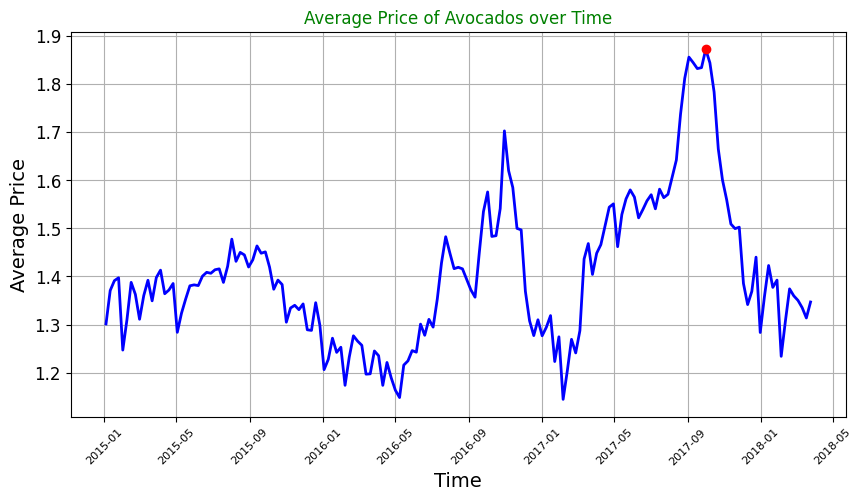

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Set the figure size

# Customize the line style and color
plt.plot(data, color='b', linewidth=2)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.title('Average Price of Avocados over Time')

# Find the overall maximum value and its index
overall_max = data.max()
overall_max_index = data.idxmax()

# Plot the overall maximum as a red circle
plt.plot(overall_max_index, overall_max, 'ro', markersize=6)

# Format x-axis labels
plt.xticks(rotation=45, fontsize=8)

# Add grid lines
plt.grid(True)

plt.show()


<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Average Price')

Text(0.5, 1.0, 'Average Price of Avocados over Time')

(array([16436., 16556., 16679., 16801., 16922., 17045., 17167., 17287.,
        17410., 17532., 17652.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16556.0, 0, '2015-05'),
  Text(16679.0, 0, '2015-09'),
  Text(16801.0, 0, '2016-01'),
  Text(16922.0, 0, '2016-05'),
  Text(17045.0, 0, '2016-09'),
  Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01'),
  Text(17652.0, 0, '2018-05')])

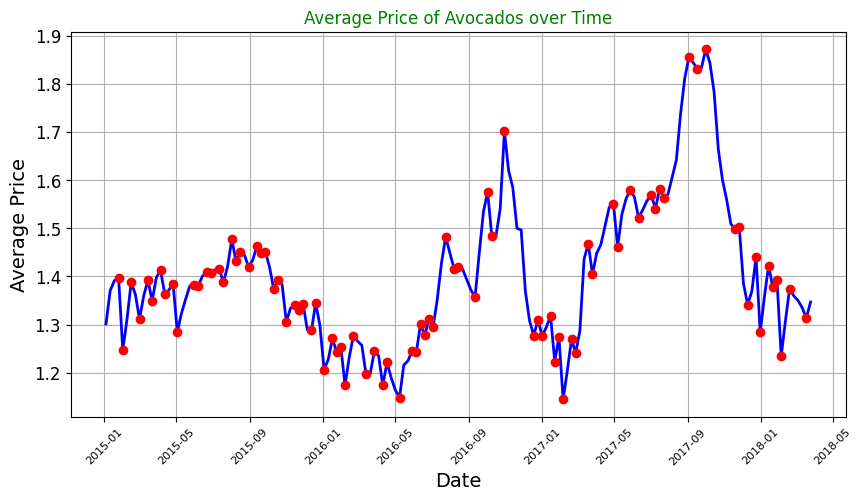

In [13]:
import matplotlib.pyplot as plt
import scipy.signal as signal

plt.figure(figsize=(10, 5))  # Set the figure size

# Customize the line style and color
plt.plot(data, color='b', linewidth=2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price of Avocados over Time')

# Find local minima and maxima
local_minima = signal.argrelmin(data.values)[0]
local_maxima = signal.argrelmax(data.values)[0]

# Plot local minima and maxima as red circles
plt.plot(data.index[local_minima], data.values[local_minima], 'ro', markersize=6)
plt.plot(data.index[local_maxima], data.values[local_maxima], 'ro', markersize=6)

# Format x-axis labels
plt.xticks(rotation=45, fontsize=8)

# Add grid lines
plt.grid(True)

plt.show()




In [14]:
result

NameError: name 'result' is not defined

Text(0.5, 62.583333333333314, 'Date')

Text(0.5, 1.0, 'Seasonal Decomposition of Average Price')

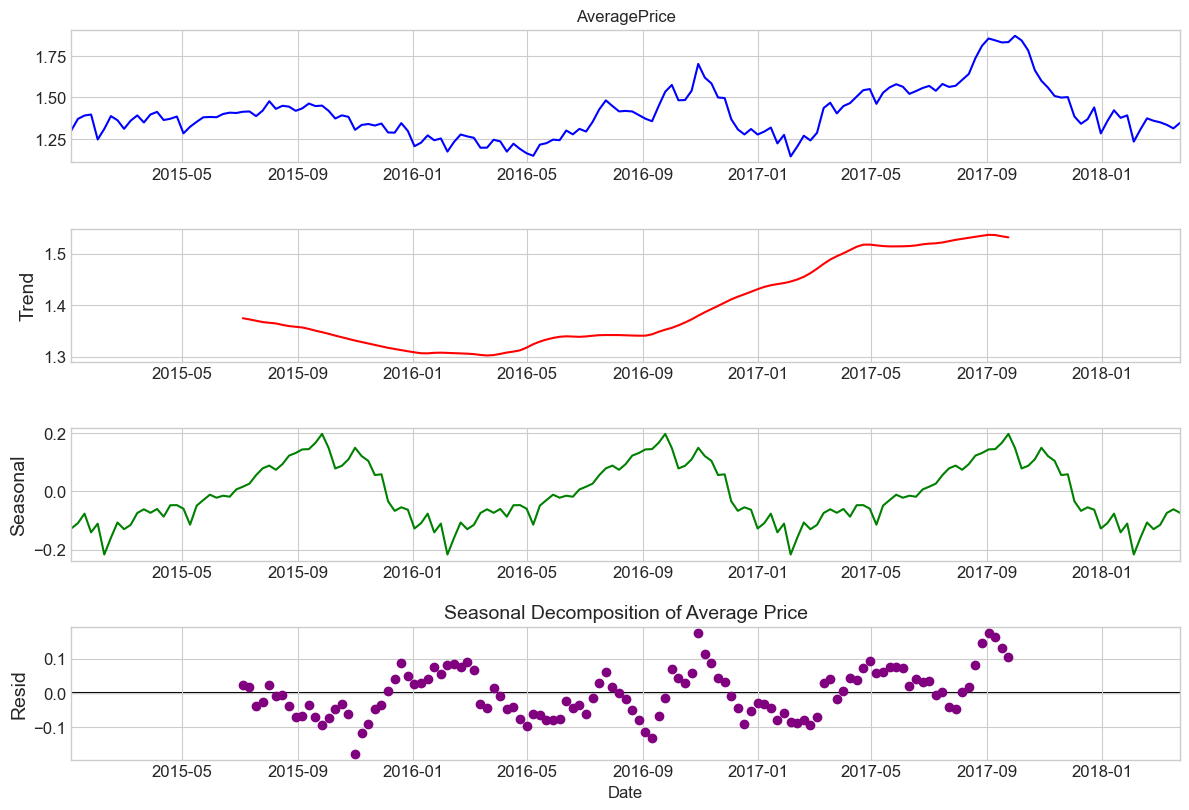

In [54]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = [12, 8]

# Perform seasonal decomposition
result = seasonal_decompose(data['AveragePrice'], model='add')

# Plot the decomposition
fig = result.plot()
fig.axes[0].lines[0].set_color('blue')   # Observed component color
fig.axes[1].lines[0].set_color('red')    # Trend component color
fig.axes[2].lines[0].set_color('green')  # Seasonal component color
fig.axes[3].lines[0].set_color('purple') # Residual component color

# Customize labels and title
plt.xlabel('Date', fontsize=12)
#plt.ylabel('Average Price', fontsize=12)
plt.title('Seasonal Decomposition of Average Price', fontsize=14)

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Increase the value to increase spacing

plt.show()




In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
result = adfuller(data.AveragePrice.dropna()) #The ADF test is a statistical hypothesis test commonly used to determine the presence of a unit root in a time series, which indicates whether the series is stationary or not.
print('ADF Statistic: %f' %result[0]) #-2.36, sugests less likely to have a nuit root, and is favorably stationary
print('p-value: %f' % result[1]) #-0.154, not enough to reject null hypothesis of a unit root, results can be labeled at directional

ADF Statistic: -2.357817
p-value: 0.153998


In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

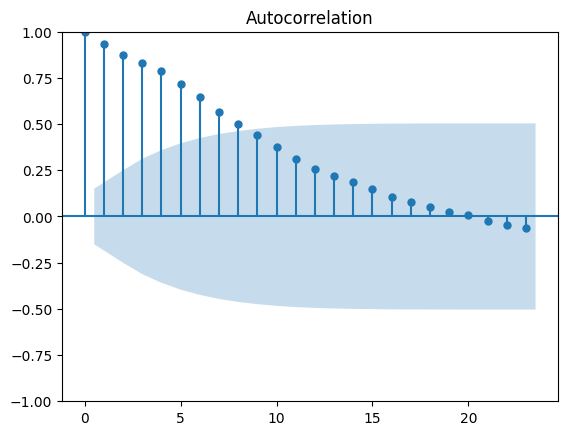

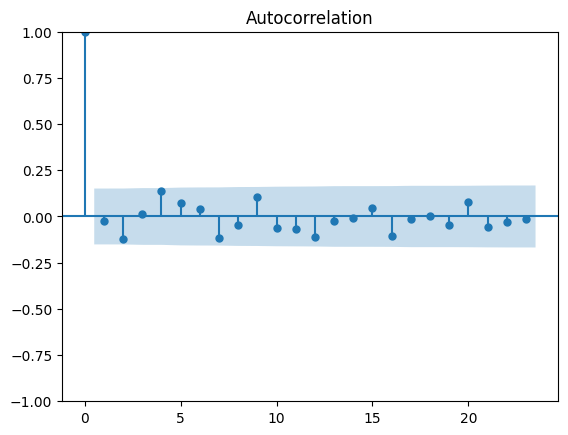

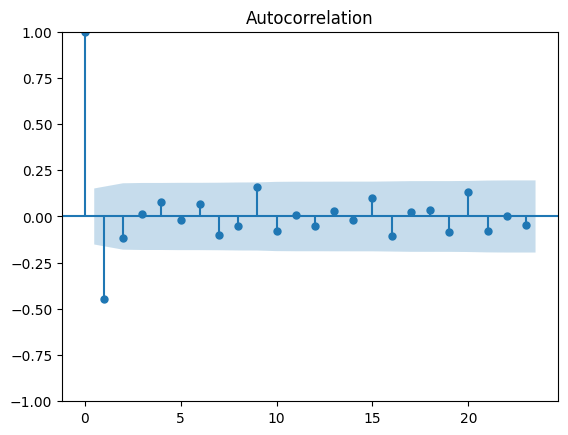

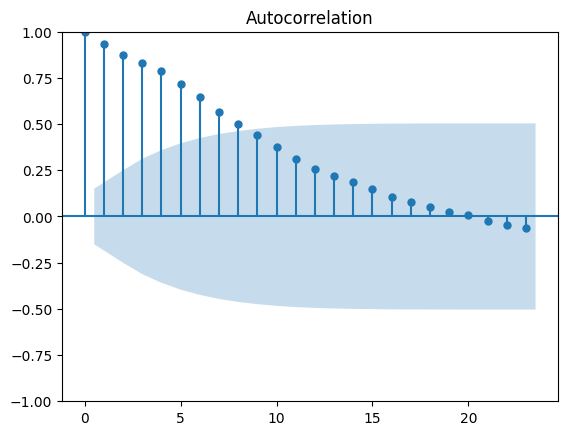

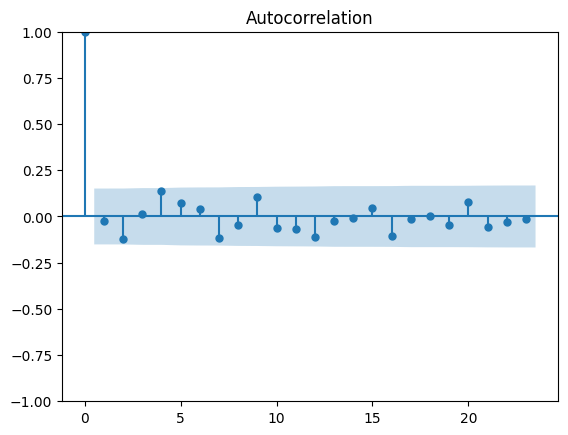

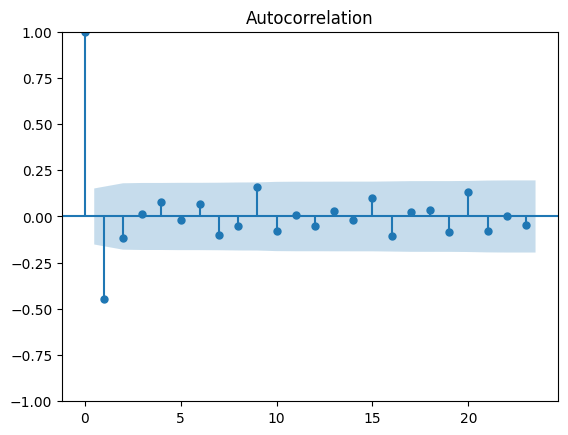

In [16]:
plt.style.use('default')
plot_acf(data.AveragePrice)
plot_acf(data.AveragePrice.diff().dropna())
plot_acf(data.AveragePrice.diff().diff().dropna())

Above plots indicates time series reaches stationary with one order of differencing. Using 'ndiffs' to estimate 'd'. It performs a test of stationarity for different level of 'd' to estimate the # of differences needed to make a given TS stationary. It selects the maximum value of 'd' for which the TS is judge stationary by the test. 

In [62]:
from pmdarima.arima.utils import ndiffs

In [63]:
ndiffs(data.AveragePrice, test = 'adf') #Answer is 1, which is in tune with plots

1

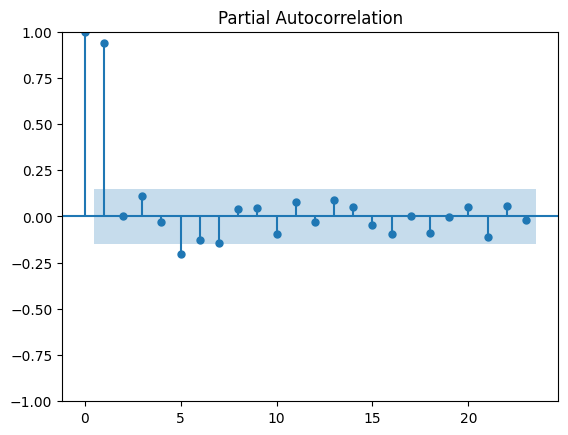

In [64]:
plot_pacf(data.AveragePrice)

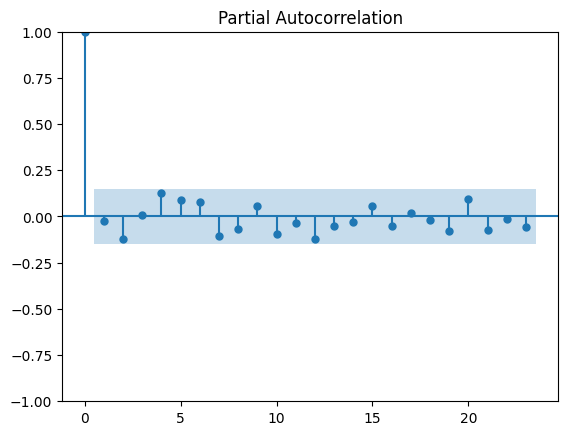

In [66]:
# 1st order differencing
plot_pacf(data.AveragePrice.diff().dropna())

We can observe that the PACF without any lag is quite significant and well within the significance limit (blue region).So we will choose p as 0.

In [21]:
import itertools

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def evaluate_arima_model(order, data):
    p, d, q = order
    
    # Split the data into training and testing sets
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    
    # Fit the ARIMA model
    model = ARIMA(train, order=(p, d, q))
    model_fit = model.fit()
    
    # Generate predictions on the test set
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    
    # Calculate mean squared error
    mse = mean_squared_error(test, predictions)
    
    return mse

def evaluate_models(p_values, d_values, q_values, data):
    best_mse = float('inf')
    best_order = None
    
    # Generate all possible combinations of p, d, and q values
    orders = list(itertools.product(p_values, d_values, q_values))
    
    # Iterate over all orders and evaluate the corresponding ARIMA models
    for order in orders:
        mse = evaluate_arima_model(order, data)
        
        # Check if current model has the lowest MSE so far
        if mse < best_mse:
            best_mse = mse
            best_order = order
    
    print('Best ARIMA%s MSE=%.3f' % (best_order,best_mse))
    return best_order




In [23]:
#Evaluate Parameters
p_values = range(1, 2)  # p values from 1 to 2
d_values = range(0, 4)  # d values from 0 to 4
q_values = range(0, 2)  # q values from 0 to 2

best_order = evaluate_models(p_values, d_values, q_values, data.values)

Best ARIMA(1, 3, 1) MSE=0.024


In [24]:
model = ARIMA(data['AveragePrice'], order=best_order)
results_ARIMA = model.fit()
predictions = round(results_ARIMA.predict(), 2)
preds = pd.DataFrame(list(zip(list(predictions.index), list(predictions))), columns = ['Date', 'PredictedPrice']).set_index('Date')
predicted_df=pd.merge(data[1:], preds, left_index=True, right_index= True)

In [25]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           AveragePrice   No. Observations:                  169
Model:                 ARIMA(1, 3, 1)   Log Likelihood                 205.517
Date:                Mon, 18 Sep 2023   AIC                           -405.034
Time:                        12:56:18   BIC                           -395.698
Sample:                    01-04-2015   HQIC                          -401.244
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4456      0.060     -7.476      0.000      -0.562      -0.329
ma.L1         -0.9972      0.413     -2.413      0.016      -1.807      -0.187
sigma2         0.0048      0.002      2.313      0.021       0.001       0.009
===================================================================================
Ljung-Box (L1) (Q):                   5.39   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.02   Prob(JB):                         0.47
Heteroskedasticity (H):               1.39   Skew:                            -0.21
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'ARIMA Residuals')

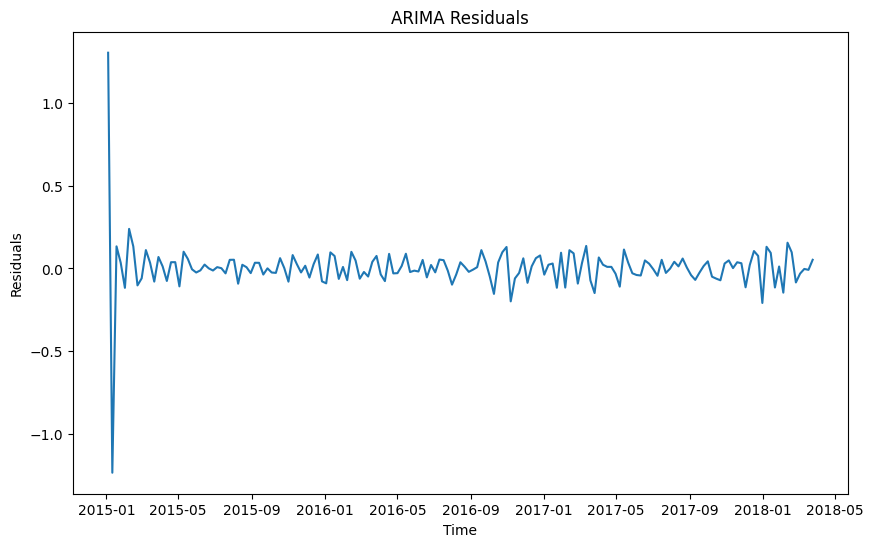

In [27]:
import matplotlib.pyplot as plt

# Generate the residuals of the ARIMA model
residuals = results_ARIMA.resid

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the residuals as a line plot
ax.plot(residuals)

# Set plot labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Residuals")
ax.set_title("ARIMA Residuals")

# Display the plot
plt.show()

<Axes: ylabel='Density'>

Text(0.5, 0, 'Residuals')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Density Plot of ARIMA Residuals')

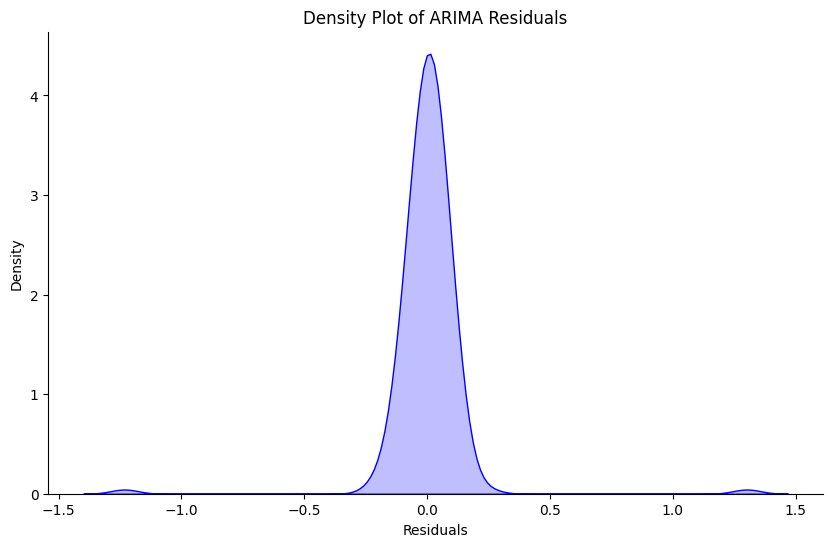

In [28]:
residuals = results_ARIMA.resid

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the density plot (KDE) of the residuals
sns.kdeplot(residuals, ax=ax, shade=True, color='blue')

# Set plot labels and title
ax.set_xlabel("Residuals")
ax.set_ylabel("Density")
ax.set_title("Density Plot of ARIMA Residuals")

# Remove spines
sns.despine()

# Display the plot
plt.show()

In [29]:
residuals.describe()

count    169.000000
mean       0.004018
std        0.155390
min       -1.231944
25%       -0.039413
50%        0.008130
75%        0.049881
max        1.301296
dtype: float64

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'ARIMA Model Predictions')

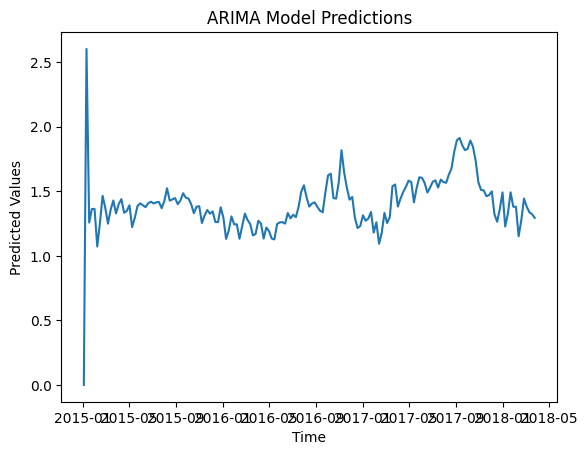

In [30]:
predicted_values = results_ARIMA.predict()
plt.plot(predicted_values)
plt.xlabel('Time')
plt.ylabel('Predicted Values')
plt.title('ARIMA Model Predictions')
plt.show()

In [37]:

predicted_prices = predicted_df['PredictedPrice']
actual_prices = predicted_df['AveragePrice']

mape = np.mean(np.abs(predicted_prices - actual_prices) / np.abs(actual_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, predicted_prices)

print(f"Mean Absolute Percentage Error: {mape}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Percentage Error: 0.04603087038875163
Mean Absolute Error: 0.06320360789694902
Mean Squared Error: 0.014049028006099614
Root Mean Squared Error: 0.11852859573157701
R2 Score: 0.3878731935047892


Text(0.5, 0, 'Time')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'ARIMA Model Predictions')

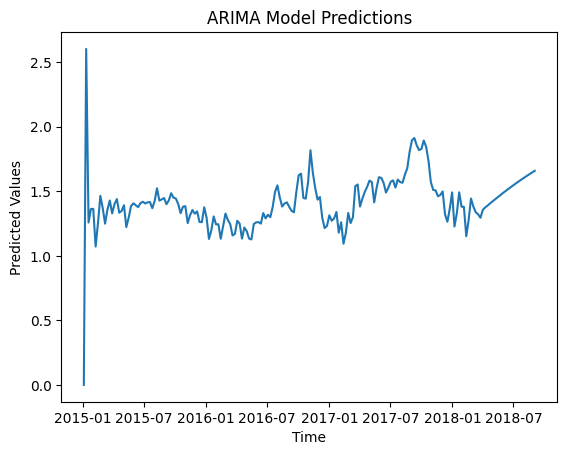

In [38]:
predicted_values = results_ARIMA.predict(end='2018-08-31')
plt.plot(predicted_values)
plt.xlabel('Time')
plt.ylabel('Predicted Values')
plt.title('ARIMA Model Predictions')
plt.show()

### SARIMA Model

A SARIMA (Seasonal AutoRegressive Integrated Moving Average) model is a time series forecasting method that extends the ARIMA model to account for seasonal patterns in the data. It's used to model and predict time series data with both non-seasonal and seasonal components. SARIMA combines the following elements:

Seasonal Component (S): SARIMA includes seasonality, which represents recurring patterns or fluctuations that occur at regular intervals within the time series data. The "S" component refers to the number of time steps in one seasonal cycle (e.g., monthly data might have a seasonal cycle of 12 if it's yearly data).

AutoRegressive (AR) Component: Similar to ARIMA, SARIMA includes an autoregressive component that models the relationship between the current observation and past observations within the same series.

Integrated (I) Component: As in ARIMA, SARIMA can include differencing to make the time series stationary, which helps remove trends and seasonality from the data.

Moving Average (MA) Component: SARIMA includes a moving average component that accounts for short-term dependencies between the current observation and past white noise or error terms..

In [33]:
import statsmodels.api as sm

In [39]:
# Create a SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) model
# for the 'AveragePrice' time series data.
#P (Seasonal AutoRegressive Order), D (Seasonal Integration Order), Q (Seasonal Moving Average Order), S (Seasonal Periodicity)
mod = sm.tsa.statespace.SARIMAX(data['AveragePrice'],
                                order=(1, 0, 0),  # Non-seasonal ARIMA order (p, d, q)
                                seasonal_order=(1, 1, 1, 12),  # Seasonal order (P, D, Q, s)
                                enforce_stationarity=False,  # Allow non-stationary time series
                                enforce_invertibility=False)  # Allow non-invertible model

# Fit the SARIMAX model to the data and obtain the results
results = mod.fit()

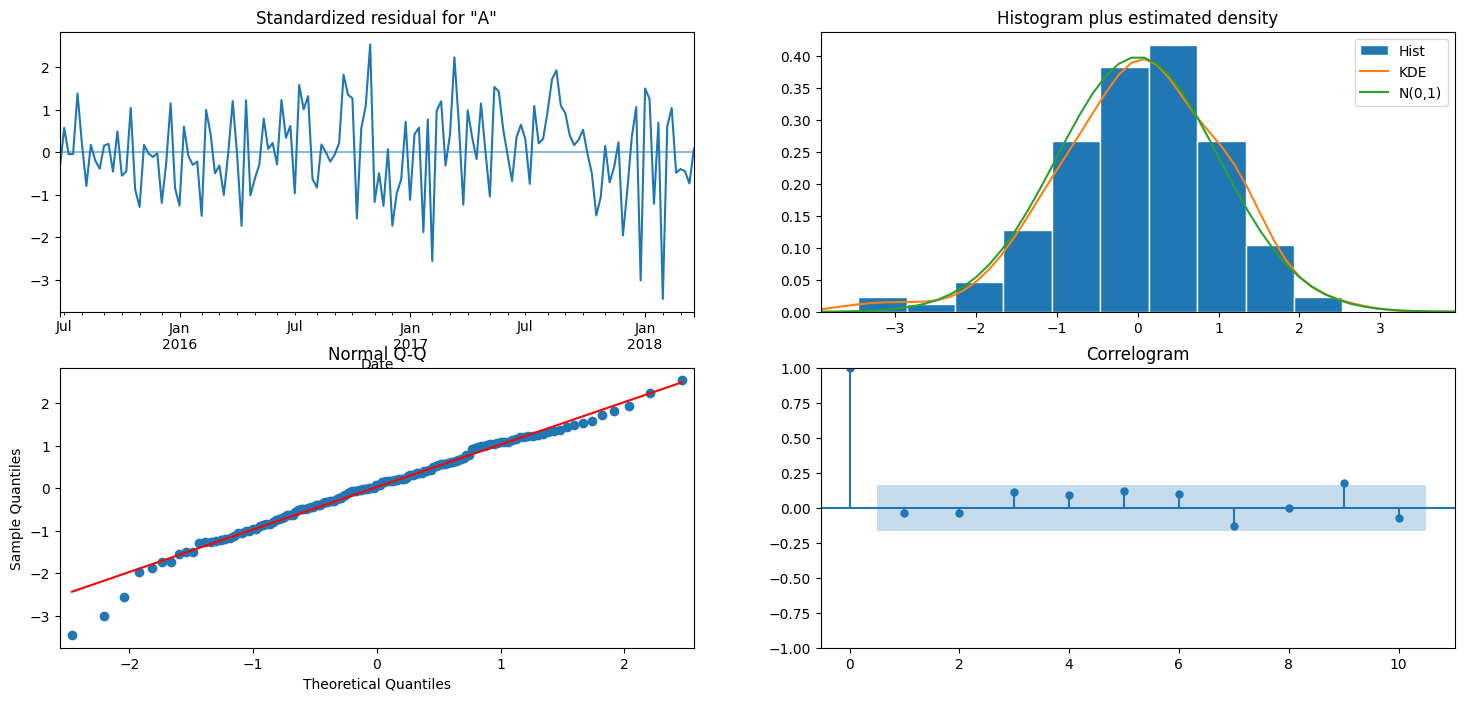

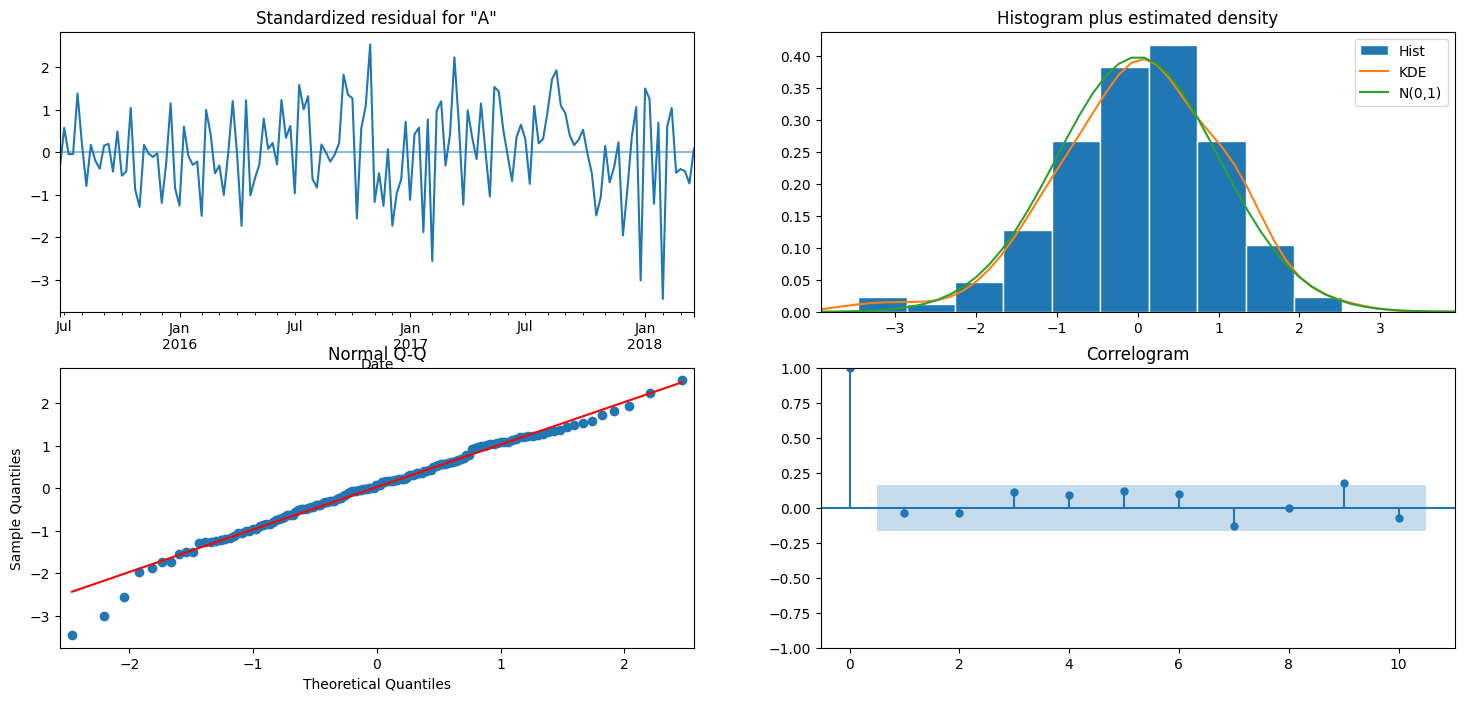

In [35]:
results.plot_diagnostics(figsize=(18, 8))
plt.ioff()

<Axes: xlabel='Date'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Retail_sold')

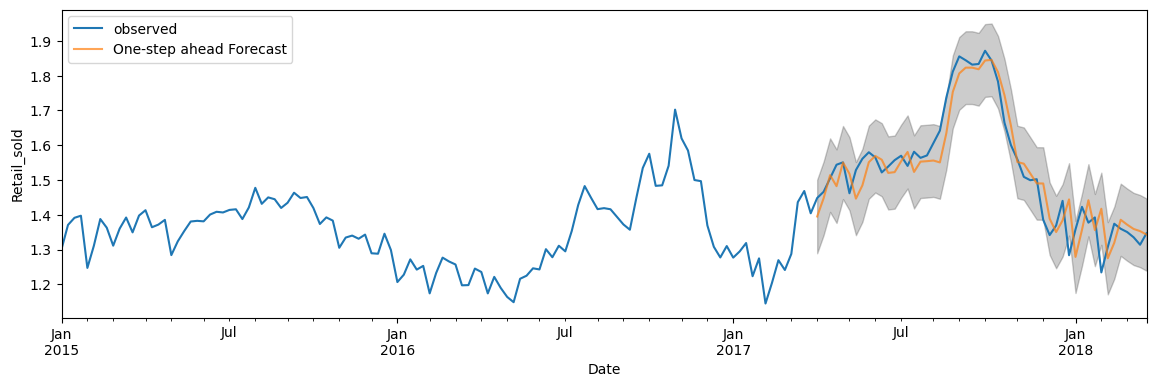

In [41]:
# Get one-step ahead predictions from the SARIMA model starting from the specified date
pred = results.get_prediction(start=pd.to_datetime('2017-04-02'), dynamic=False)

# Calculate the confidence intervals for the predictions
pred_ci = pred.conf_int()

# Plot the observed 'AveragePrice' data
ax = data['AveragePrice'].plot(label='observed')

# Plot the one-step ahead forecasted values on the same plot
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))

# Fill the area between the upper and lower confidence intervals
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()


<Axes: xlabel='Date'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

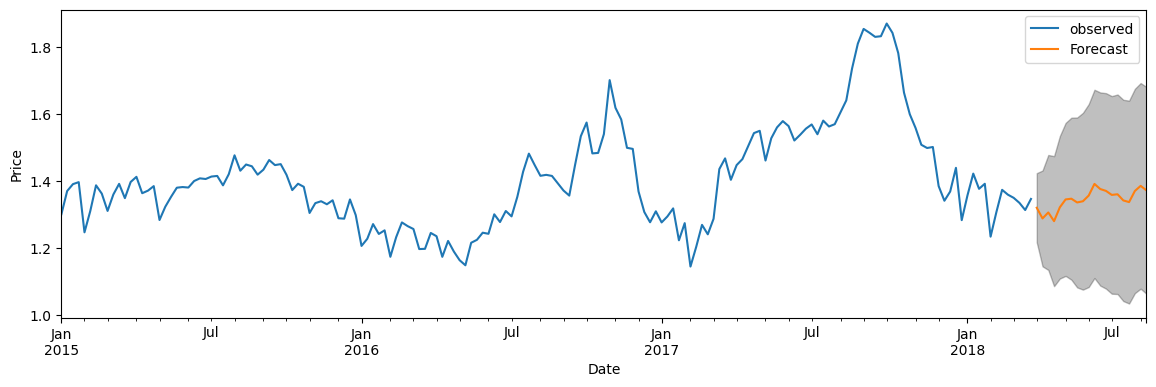

In [42]:
# Get a forecast of future values from the SARIMA model for a specified number of steps (here, 20 steps)
pred_uc = results.get_forecast(steps=20)
# Calculate the confidence intervals for the forecasted values
pred_ci = pred_uc.conf_int()

ax = data['AveragePrice'].plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()